# Conducción estacionaria

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019**

- Autor: Luis M. de la Cruz Salas
- Rev: lun 18 ene 2021 12:02:41 CST

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para el estilo de las gráficas
plt.style.use('seaborn-paper')
params = {'figure.figsize' : (14,7),
          'text.usetex'    : True,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'axes.labelsize' : 24,
          'axes.titlesize' : 24,
          'legend.fontsize': 24,
          'lines.linewidth': 3,
          'lines.markersize': 10,
          'grid.color'     : 'darkgray',
          'grid.linewidth' : 0.5,
          'grid.linestyle' : '--',
          'font.family': 'DejaVu Serif',
         }
plt.rcParams.update(params)

In [56]:
def buildMatrix(N):
    # Matriz de ceros
    A = np.zeros((N,N))
    
    # Primer renglón
    A[0,0] = 2
    A[0,1] = -1
    
    # Renglones interiores
    for i in range(1,N-1):
        A[i,i] = 2
        A[i,i+1] = -1
        A[i,i-1] = -1
    
    # Último renglón
    A[N-1,N-2] = -1
    A[N-1,N-1] = 2
    
    return A

In [57]:
# Parámetros físicos
L = 1.0
TA = 1
TB = 0
k = 1.0
S = 0.0

# Parámetros numéricos
N = 4
h = L / (N+1)
r = k / h**2

T =  [1.  0.8 0.6 0.4 0.2 0. ]


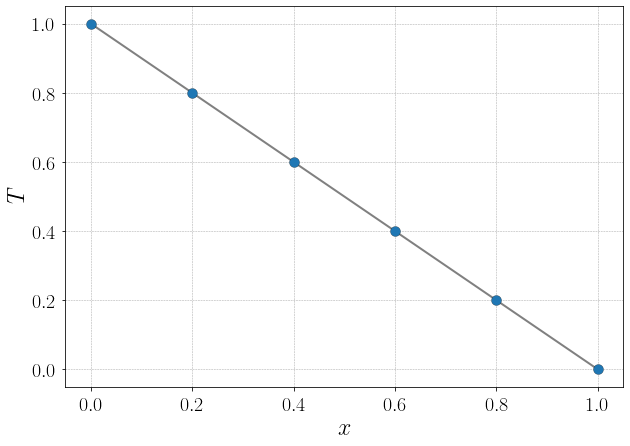

In [58]:
# Arreglo para almacenar la solución
T = np.zeros(N+2)
T[0]  = TA  # Frontera izquierda
T[-1] = TB  # Frontera derecha

# Lado derecho del sistema
b = np.zeros(N)
b[:] = S / r # Fuente o sumidero
b[0]  = T[0]   # Condición de frontera
b[-1] = T[-1]  # Condición de frontera

# Construcción de la matriz
A = buildMatrix(N)

# Solución del sistema lineal
T[1:N+1] = np.linalg.solve(A,b)

# Impresión y graficación de la solución
print('T = ', T)
x = np.linspace(0, L, N+2)
plt.figure(figsize=(10,7))
plt.plot(x, T, c='grey', lw=2.0)
plt.scatter(x, T, edgecolor='k', zorder= 10)
plt.xlabel('$x$')
plt.ylabel('$T$')
plt.grid()
plt.savefig('num_cond01.pdf')
plt.show()

In [130]:
def solExact(x, TA, TB, k, L, S):
    """
    Cálculo de la solución exacta.
    """
    return ((TB-TA)/L+(S/(2*k))*(L-x))*x+TA

def solNum(L, N, k, S, A, b, T, etiqueta):
    h = L / (N+1)
    r = k / h**2
    
    # Lado derecho del sistema
    b = np.zeros(N)
    b[:] = S / r # Fuente o sumidero
    b[0]  += T[0]   # Condición de frontera
    b[-1] += T[-1]  # Condición de frontera

    # Solución del sistema lineal
    T[1:N+1] = np.linalg.solve(A,b)

    # Impresión y graficación de la solución
    x = np.linspace(0, L, N+2)
    
    # Construcción de la etiqueta de cada gráfica
    if etiqueta == 'L':
        etiqueta = '$L$ = {:3.2f}'.format(L)
    elif etiqueta == 'k':
        etiqueta = '$\kappa$ = {:3.2f}'.format(k)
    elif etiqueta == 'S':
        etiqueta = '$S$ = {:3.2f}'.format(S)

    # Se grafican los puntos de la solución
    plt.scatter(x, T, edgecolor='k', s=50, zorder= 10, label=etiqueta)
    
def plotSol(title, filename):
    plt.suptitle('Conducción estacionaria', fontsize = 24, y = 0.94, va = 'center_baseline')
    plt.title(title, fontsize=20, color='blue')
    plt.ylabel('$T$')
    plt.xlabel('$x$')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
    plt.grid()
    plt.savefig(filename)
    plt.show()

In [131]:
# Parámetros físicos
l = [0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0]
TA = 1.0
TB = 0.0
k = 1.0
S = 1.0

# Parámetros numéricos
N = 10

# Arreglo para almacenar la solución
T = np.zeros(N+2)
T[0]  = TA  # Frontera izquierda
T[-1] = TB  # Frontera derecha

# Construcción de la matriz
A = buildMatrix(N)

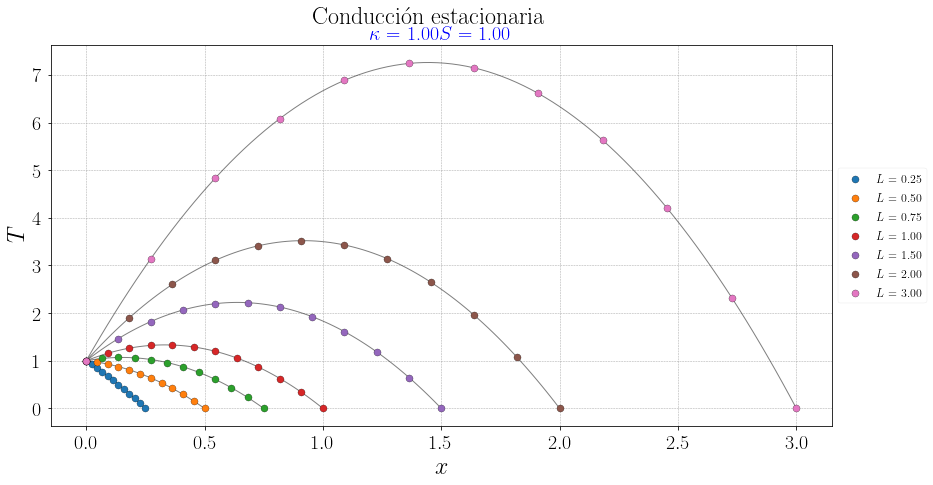

In [137]:
for L in l:
    solNumerica(L, N, k, S, A, b, T, 'L')
    xe = np.linspace(0,L,100)
    plt.plot(xe, solExacta(xe, TA, TB, k, L, S), 'k-', lw=1.0, alpha=0.5)

plotSol('$\kappa$ = {:3.2f}'.format(k) +  '$S$ = {:3.2f}'.format(k,S), 'L_variable.pdf')

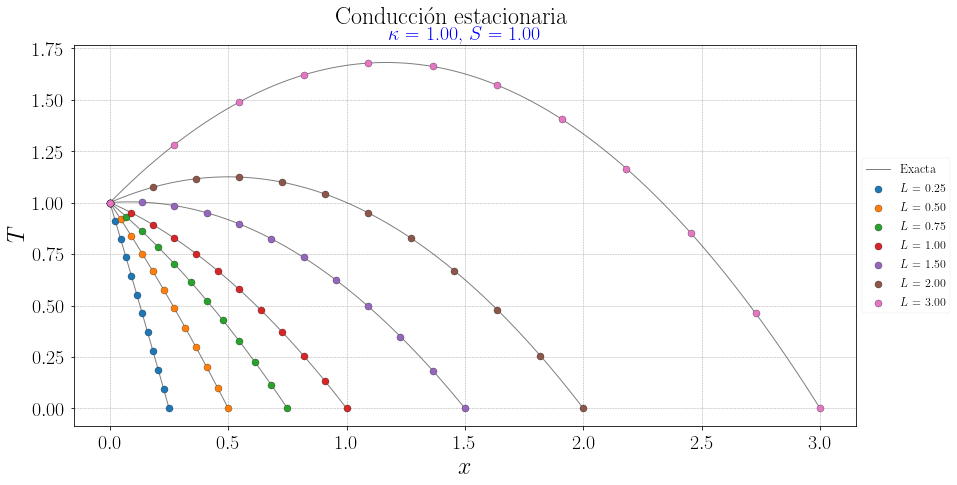

In [132]:
for L in l:
    solNumerica(L, N, k, S, A, b, T, 'L')
    xe = np.linspace(0,L,100)
    if L == 3.0:
        plt.plot(xe, solExacta(xe, TA, TB, k, L, S), 
                 'k-', lw=1.0, alpha=0.5, 
                 label='Exacta')
    else:
        plt.plot(xe, solExacta(xe, TA, TB, k, L, S), 
                 'k-', lw=1.0, alpha=0.5)

plotSol('$\kappa$ = {:3.2f}, $S$ = {:3.2f}'.format(k,S), 'L_variable.pdf')

In [133]:
# Parámetros físicos
L = 1.0
TA = 1.0
TB = 0.0
kl = [0.1, 0.15, 0.25, 0.5, 1.0, 2.0, 10]
S = 1.0

# Parámetros numéricos
N = 10

# Arreglo para almacenar la solución
T = np.zeros(N+2)
T[0]  = TA  # Frontera izquierda
T[-1] = TB  # Frontera derecha

# Construcción de la matriz
A = buildMatrix(N)

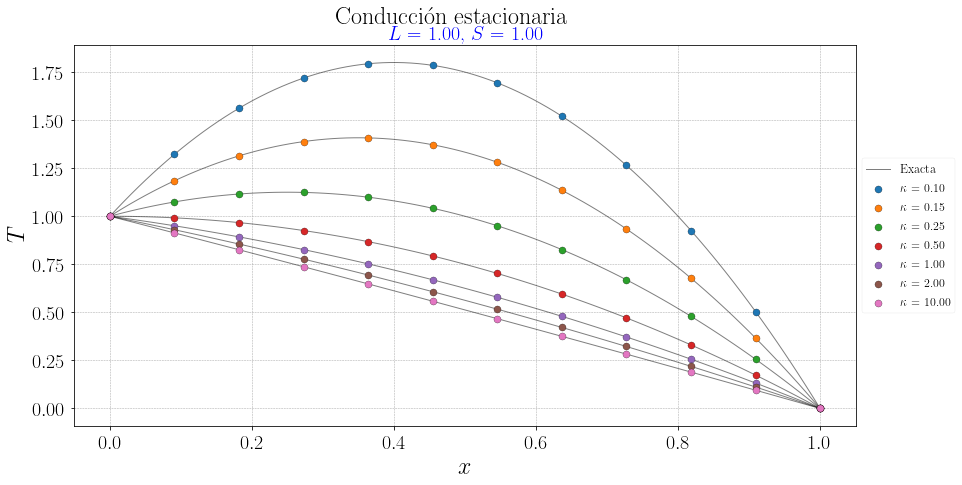

In [134]:
for k in kl:
    solNumerica(L, N, k, S, A, b, T, 'k')
    xe = np.linspace(0,L,100)
    if k == 0.1:
        plt.plot(xe, solExacta(xe, TA, TB, k, L, S), 
                 'k-', lw=1.0, alpha=0.5, 
                 label='Exacta')
    else:
        plt.plot(xe, solExacta(xe, TA, TB, k, L, S), 
                 'k-', lw=1.0, alpha=0.5)

plotSol('$L$ = {:3.2f}, $S$ = {:3.2f}'.format(L,S), 'k_variable.pdf')

In [138]:
# Parámetros físicos
L = 1.0
TA = 1.0
TB = 0.0
k = 1.0
sl = [-6.0 + 2*i for i in range(0,7)]

# Parámetros numéricos
N = 10

# Arreglo para almacenar la solución
T = np.zeros(N+2)
T[0]  = TA  # Frontera izquierda
T[-1] = TB  # Frontera derecha

# Construcción de la matriz
A = buildMatrix(N)

In [139]:
print(sl)

[-6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0]


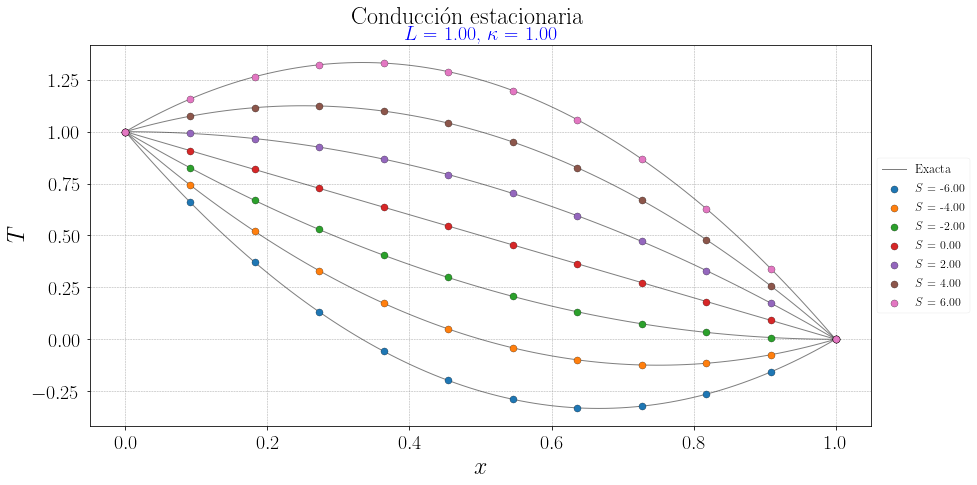

In [136]:
for S in sl:
    solNumerica(L, N, k, S, A, b, T, 'S')
    xe = np.linspace(0,L,100)
    if S == -6.0:
        plt.plot(xe, solExacta(xe, TA, TB, k, L, S), 
                 'k-', lw=1.0, alpha=0.5, 
                 label='Exacta')
    else:
        plt.plot(xe, solExacta(xe, TA, TB, k, L, S), 
                 'k-', lw=1.0, alpha=0.5)

plotSol('$L$ = {:3.2f}, $\kappa$ = {:3.2f}'.format(L,k), 'S_variable.pdf')